1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


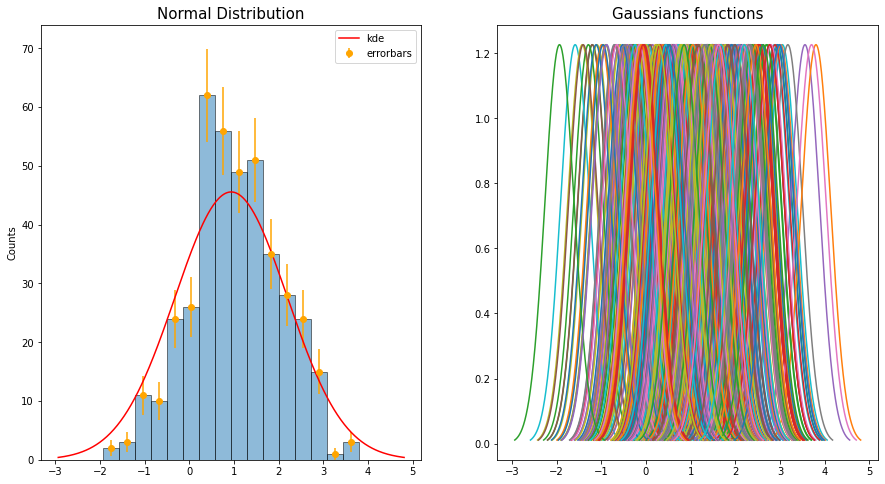

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
from scipy import integrate
from scipy.stats import norm
import math

#Creating the histogram
mean=1
sigma=1
x = npr.normal(mean, sigma, 400)
fig, (histo_plot, gauss_plot) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
histo, bins, g=histo_plot.hist(x=x, bins = 'auto', alpha=0.5, ec="black")
bincenters = 0.5*(bins[1:]+bins[:-1])
histo_plot.errorbar(bincenters, histo, yerr = histo**0.5, fmt="o", color="orange",ls="None",label="errorbars")
maxfreq=histo.max()
histo_plot.set_ylim(0,int(maxfreq + np.sqrt(maxfreq)+5))
histo_plot.set_title('Normal Distribution', fontsize=15)
histo_plot.set_ylabel('Counts')

#Creating the plot with gaussians
sigmag=1.06*x.std()*(x.size)**(-0.2)
gauss_container=[]
for i in x:
    y=np.linspace(i-mean,i+mean,400)
    gauss=norm.pdf(y, loc=i, scale=sigmag)
    gauss_plot.plot(y,gauss)
    gauss_container.append(gauss)

gauss_array=np.array(gauss_container) 
gauss_plot.set_title('Gaussians functions',fontsize=15)

#creating kde
somma = np.sum(gauss_array,axis=0)
space=np.linspace(x.min()-mean,x.max()+mean,400)
g_int = integrate.trapz(somma, space)
isto = np.sum(np.diff(bins)*histo)
kde = isto*somma/g_int

histo_plot.plot(space,kde, color="red",label="kde")
histo_plot.legend()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-15 00:01:02--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-15 00:01:03--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9a1bea71bc4c3f2283881ac676.dl.dropboxusercontent.com/cd/0/inline/Bb0NSjf2ArUZ5pNbe3y8kQjPVhu6q8wKu64870f5I869eO3-jb9C8ajsX0HCmnWPoKI_oivZZJNx1Uqf0Jz-CSinz4pm4zVJDgO0q-3M4bxZVRdE3iSHi3L90cIpG9sXw-BHMnpfsrd9BRjh-9wyeaUx/file# [following]
--2021-12-15 00:01:03--  https://uc9a1bea71bc4c3f2283881ac676.dl.dropboxusercontent.com/cd/0/inline/Bb0NSjf2ArUZ5pNbe3y8kQjPVhu6q8

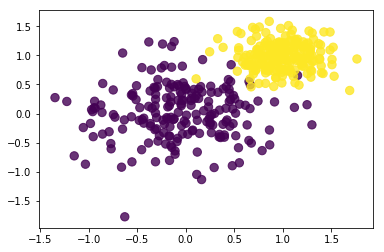

In [29]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

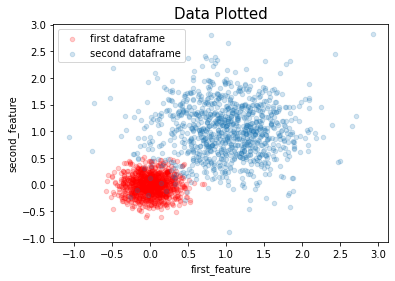

In [7]:
import pandas as pd

def gaussdataset(mu1,std1,mu2,std2,points):
    x1 = np.random.normal(mu1, std1, points)
    dataset1=pd.DataFrame(data=x1,columns=["x1"])
    x2 = np.random.normal(mu1, std1, points)
    dataset1["x2"]=x2
    y1 = np.random.normal(mu2, std2, points)
    dataset2=pd.DataFrame(data=y1,columns=["y1"])
    y2 = np.random.normal(mu2, std2, points)
    dataset2["y2"]=y2
    ax=dataset1.plot.scatter(x="x1",y="x2", color="r", alpha=0.2,label="first dataframe")
    dataset2.plot.scatter(x="y1",y="y2", ax=ax, alpha=0.2, label="second dataframe")
    ax.set_title('Data Plotted', fontsize = 15)
    ax.set_xlabel('first_feature')
    ax.set_ylabel('second_feature')
    ax.legend()

gaussdataset(0,0.2,1,0.5,1000)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


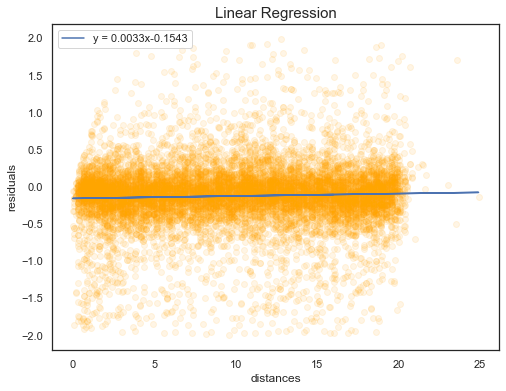

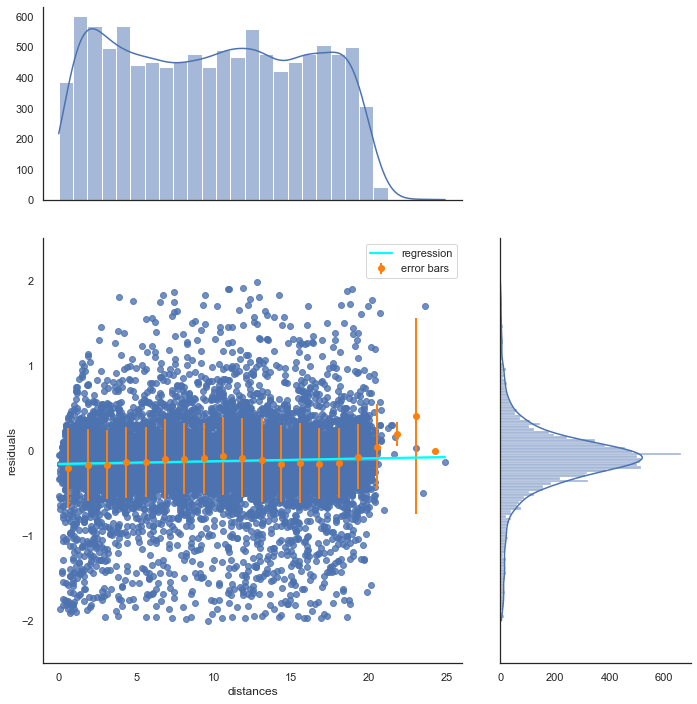

In [7]:
import pandas as pd
import scipy
import seaborn as sns
data=np.load("/Users/Elena/Downloads/residuals_261.npy",allow_pickle = True).item()
df=pd.DataFrame(data=data)
df_clean=df[abs(df['residuals']) < 2]
display(df_clean)
#linear regression
x = df_clean['distances']
y = df_clean['residuals']
reg = scipy.stats.linregress(x,y)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, color = 'orange', alpha = 0.1)
ax.plot(x, reg.intercept + reg.slope*x,label='y = {0:.4f}x{1:.4f}'.format(reg.slope,reg.intercept))
ax.set_title('Linear Regression', fontsize = 15)
ax.set_xlabel('distances')
ax.set_ylabel('residuals')
ax.legend()
#seaborn jointplot
sns.set(style="white", color_codes=True)
joint=sns.jointplot(x="distances", y="residuals", kind="reg", data=df_clean,ratio=2,height=10,xlim=(-1,26),ylim=(-2.5,2.5),marginal_ticks=True,line_kws={"color": "cyan",  "label":"regression" });
#errorbars 
h, b = np.histogram(df_clean['distances'], bins=20)
x = 0.5*(b[1:] + b[:-1]) 
y =np.zeros(len(b)-1)
erry = np.zeros(len(b)-1)

for i in range(len(b)-2):
    mask = np.logical_and(df_clean['distances']>=b[i], df_clean['distances']<=b[i+1])
    dfi = df_clean[mask]
    y[i] = dfi['residuals'].mean()
    erry[i] = dfi['residuals'].std()
            
joint.ax_joint.errorbar(x, y, erry, c='tab:orange', fmt='o', ecolor='tab:orange', label='error bars', elinewidth=2)
joint.ax_joint.legend(loc="best")